## Use Sarimax to predict interest in CHURRASCO
1. Transform Index to have weekly frecuency. Use "W".
2. Visualize data
3. Create training and test set. Test Set should be 10 weeks 
4. Extract Exogenous Variables and Create SARIMAX model
5. Predict 10 weeks and Vizualize them, toghether with the training and test set
6. Assess Model based on MAPE

## 1

In [1]:
#libraries
import pandas as pd
import numpy as np

In [3]:
#path
%cd C:\Users\leoma\Desktop\projects\Modelos-de-Pronosticos-Series-Temporales-Python\SARIMAX

c:\Users\leoma\Desktop\projects\Modelos-de-Pronosticos-Series-Temporales-Python\SARIMAX


In [6]:
# data, index & dates
data = pd.read_csv('Churrasco.csv',
                    index_col='Week',
                    parse_dates=True)
data.head()


,Churrasco,Easter,Carnaval,Republic
Week,,,,
2016-01-31,42,0,0,0
2016-02-07,45,0,1,0
2016-02-14,40,0,0,0
2016-02-21,36,0,0,0
2016-02-28,39,0,0,0


fechas correctas con parse_dates

In [39]:
#frecuency
data = data.asfreq("W-SUN")
data.index

DatetimeIndex(['2016-02-07', '2016-02-14', '2016-02-21', '2016-02-28',
               '2016-03-06', '2016-03-13', '2016-03-20', '2016-03-27',
               '2016-04-03', '2016-04-10',
               ...
               '2020-11-15', '2020-11-22', '2020-11-29', '2020-12-06',
               '2020-12-13', '2020-12-20', '2020-12-27', '2021-01-03',
               '2021-01-10', '2021-01-17'],
              dtype='datetime64[ns]', name='Week', length=259, freq='W-SUN')

In [12]:
# Rename variables
data = data.rename(columns= {'Churrasco': 'y'})
data.head()

,y,Easter,Carnaval,Republic
Week,,,,
2016-01-31,42,0,0,0
2016-02-07,45,0,1,0
2016-02-14,40,0,0,0
2016-02-21,36,0,0,0
2016-02-28,39,0,0,0


## 2

<AxesSubplot: xlabel='Week'>

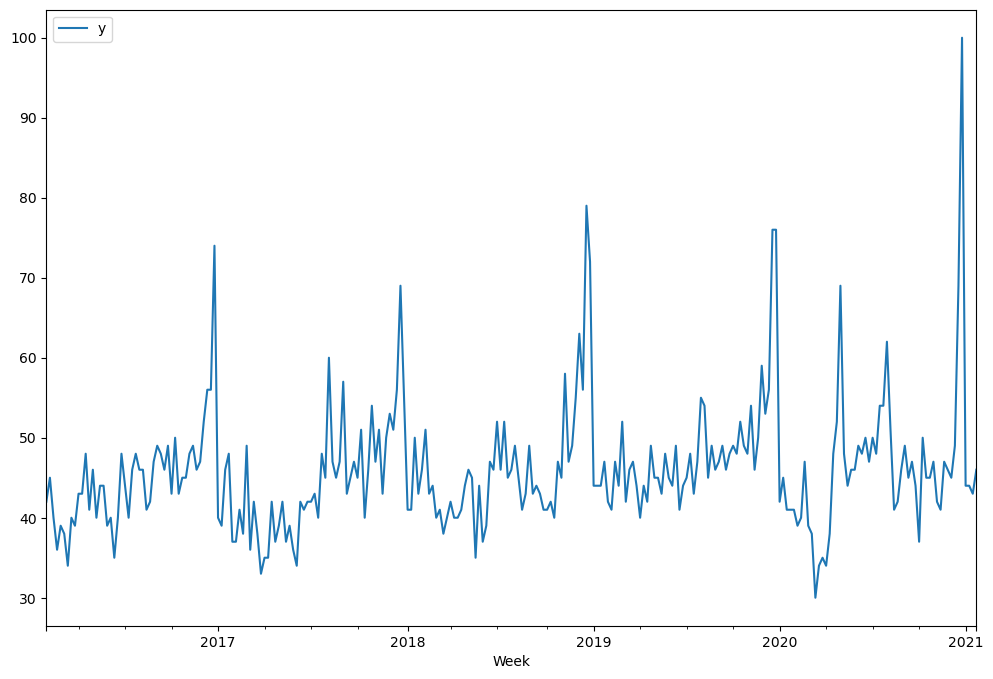

In [13]:
#Visualize
data['y'].plot(figsize=(12,8), legend=True)

PODEMOS VER AL MENOS UNA ESTACIONALIDAD...NO DIRIAMOS QUE HAY UNA SOLA, PERO SE PUEDE VER
TAMBIEN PODEMOS VER EL COMIENZO DE LA PANDEMIA.

REVISEMOS SI ES ESTACIONARIO

In [18]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
stationarity = adfuller(data['y'])
print('Augmented Dickey Fuller p-value: %F' % stationarity[1])

Augmented Dickey Fuller p-value: 0.000000


## 3

In [22]:
# Training and Test Set
week = 10
training_set = data.iloc[:-week,:]
test_set = data.iloc[-week:,:]
test_set.head(11)


,y,Easter,Carnaval,Republic
Week,,,,
2020-11-22,47,0,0,0
2020-11-29,46,0,0,0
2020-12-06,45,0,0,0
2020-12-13,49,0,0,0
2020-12-20,69,0,0,0
2020-12-27,100,0,0,0
2021-01-03,44,0,0,0
2021-01-10,44,0,0,0
2021-01-17,43,0,0,0


## 4

In [25]:
#Exogenous variables
train_exog = training_set.iloc[:,1:]
test_exog = test_set.iloc[:,1:]
test_exog.head(20)

,Easter,Carnaval,Republic
Week,,,
2020-11-22,0,0,0
2020-11-29,0,0,0
2020-12-06,0,0,0
2020-12-13,0,0,0
2020-12-20,0,0,0
2020-12-27,0,0,0
2021-01-03,0,0,0
2021-01-10,0,0,0
2021-01-17,0,0,0


In [26]:
#model
#cargando librerias
from pmdarima import auto_arima

In [40]:
# forecasting model
model = auto_arima (y = training_set['y'],
                    X =train_exog,
                    m = 52,
                    stepwise = True) # acelera la optimizacion para encontrar el mejor algoritmo; 1. puede suceder que no los encuentre pero algo cercarno y 2 puede obtener algo parecido al profe   
                    

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  251
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 52)   Log Likelihood                -773.211
Date:                            Wed, 06 Sep 2023   AIC                           1560.421
Time:                                    22:34:17   BIC                           1585.099
Sample:                                01-31-2016   HQIC                          1570.352
                                     - 11-15-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.8457      1.616      7.949      0.000       9.678      16.013
Easter        -1.4460      2.791     -0.518      0.604      -6.916       4.024
Carnaval       6.0102      3.086      1.948      0.051      -0.038      12.058
Republic       9.2586      1.608      5.759      0.000       6.108      12.409
ar.L1          0.4208      0.041     10.141      0.000       0.339       0.502
ar.S.L52       0.5132      0.043     12.007      0.000       0.429       0.597
sigma2        25.5836      1.894     13.505      0.000      21.871      29.297
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                90.70
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             0.79
Prob(H) (two-sided):                  0.50   Kurtosis:                         5.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
# predictions
predictions_sarimax = model.predict(n_periods= week,
                            X= test_exog)
predictions_sarimax

2020-11-22    41.928428
2020-11-29    49.970012
2020-12-06    48.331107
2020-12-13    50.476760
2020-12-20    60.995750
2020-12-27    61.103062
2021-01-03    43.699476
2021-01-10    45.258072
2021-01-17    43.213275
2021-01-24    43.216639
Freq: W-SUN, dtype: float64

In [45]:
# # To_Series to index to DF
predictions_sarimax = pd.Series(model.predict(n_periods= week,
                            X= test_exog)).rename('SARIMAX')
predictions_sarimax.index = test_set.index
predictions_sarimax.head(1)


Week
2020-11-22    41.928428
Freq: W-SUN, Name: SARIMAX, dtype: float64

<AxesSubplot: xlabel='Week'>

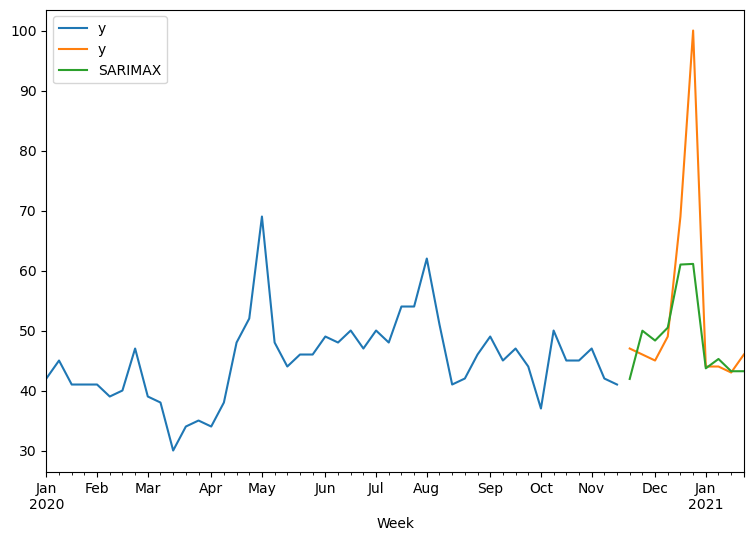

In [46]:
# Plooting
training_set['y']['2020-01-01':].plot(legend= True,
                                       figsize= (9,6))
test_set['y'].plot(legend=True)
predictions_sarimax.plot(legend=True)

In [47]:
# MAPE
def MAPE(y_true, y_pred):
    y_true, Y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-Y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_sarimax)

9.04236343201835